# Neural Network Demo

### Dependencies and data

In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

%matplotlib inline

/Users/tribui/miniconda3/envs/minds/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/tribui/miniconda3/envs/minds/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/tribui/miniconda3/envs/minds/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/tribui/miniconda3/envs/minds/lib/pyt

In [2]:
def create_data(make_data, scaler, param_dict, n=1000):
    
    """
    Generate random data, split it into a train and test set, and scale the data.
    
    Parameters
    ----------
    make_data : function
        Function that generates random data
    scaler : sklearn scaler object
        Transformer object that scale features
    param_dict : dict
        Keyword arguments for the data generator function
    n : int, optional
        Number of data samples to generate, by default 1000
        
    Returns
    -------
    numpy.ndarray
        Scaled training set features
    numpy.ndarray
        Scaled training set target labels
    numpy.ndarray
        Scaled test set features
    numpy.ndarray
        Scaled test set target labels
    sklearn scaler object
        Fit scaler
    """
    
    # Create data
    X, y = make_data(n_samples=n, random_state=n, **param_dict)
    df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
    df['Target'] = y
    
    # Plot data
    df.plot(kind='scatter', x='Feature 1', y='Feature 2', c='Target', colormap='winter')
    plt.show()
    
    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=n)

    # Scale data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test, scaler

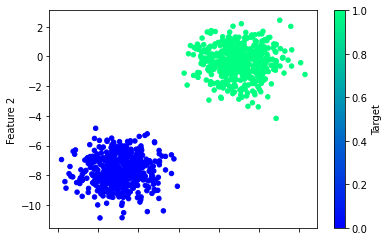

((750, 2), (250, 2), (750,), (250,))

In [3]:
# Create blob data
blob_params = {'centers': 2, 'n_features': 2}
X_blob_train, X_blob_test, y_blob_train, y_blob_test, blob_scaler = create_data(make_blobs, 
                                                                                StandardScaler(), 
                                                                                blob_params)
X_blob_train.shape, X_blob_test.shape, y_blob_train.shape, y_blob_test.shape

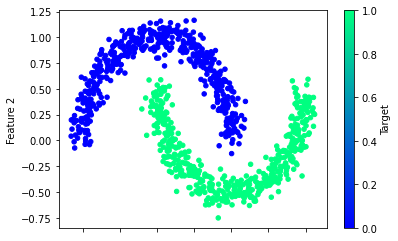

((750, 2), (250, 2), (750,), (250,))

In [4]:
# Create moon-shaped data
moon_params = {'noise': 0.08}
X_moon_train, X_moon_test, y_moon_train, y_moon_test, moon_scaler = create_data(make_moons, 
                                                                                StandardScaler(), 
                                                                                moon_params)
X_moon_train.shape, X_moon_test.shape, y_moon_train.shape, y_moon_test.shape

### Single-neuron neural network

In [5]:
# Sequential NN model
nn1 = tf.keras.models.Sequential(name='Single-neuron NN')

# Add input layer with 2 features and hidden layer with 1 neuron
in_layer = tf.keras.layers.Dense(units=1, activation='relu', input_dim=2)
nn1.add(in_layer)

# Add output layer
out_layer = tf.keras.layers.Dense(units=1, activation='sigmoid')
nn1.add(out_layer)

# Show model structure
nn1.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "Single-neuron NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Compile model
nn1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Train model on blob data

In [7]:
# Train model on blob data
nn1_blob = nn1.fit(X_blob_train, y_blob_train, epochs=100)

Epoch 1/100
750/750 [==============================] - 0s 181us/sample - loss: 0.5493 - acc: 0.9853
Epoch 2/100
750/750 [==============================] - 0s 70us/sample - loss: 0.5326 - acc: 0.9933
Epoch 3/100
750/750 [==============================] - 0s 55us/sample - loss: 0.5162 - acc: 0.9947
Epoch 4/100
750/750 [==============================] - 0s 53us/sample - loss: 0.5001 - acc: 0.9960
Epoch 5/100
750/750 [==============================] - 0s 50us/sample - loss: 0.4843 - acc: 0.9960
Epoch 6/100
750/750 [==============================] - 0s 46us/sample - loss: 0.4689 - acc: 0.9973
Epoch 7/100
750/750 [==============================] - 0s 48us/sample - loss: 0.4539 - acc: 0.9973
Epoch 8/100
750/750 [==============================] - 0s 56us/sample - loss: 0.4393 - acc: 0.9987
Epoch 9/100
750/750 [==============================] - 0s 57us/sample - loss: 0.4253 - acc: 0.9987
Epoch 10/100
750/750 [==============================] - 0s 49us/sample - loss: 0.4118 - acc: 0.9987
Epoch 11

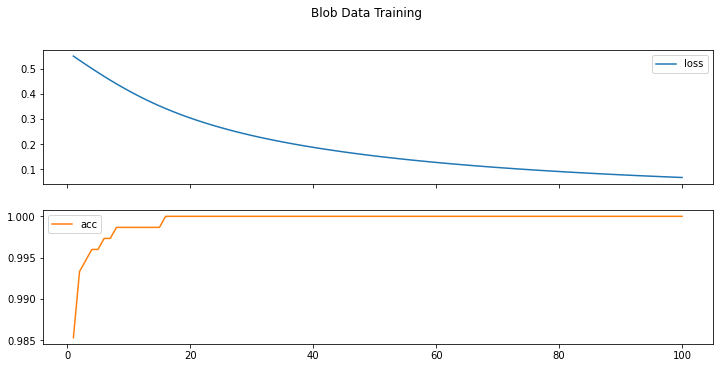

250/250 [==============================] - 0s 126us/sample - loss: 0.0675 - acc: 1.0000


[0.06747817420959473, 1.0]

In [8]:
# Plot training loss and accuracy
nn1_blob_hist = pd.DataFrame(nn1_blob.history, index=range(1, len(nn1_blob.history['loss']) + 1))
nn1_blob_hist.plot(subplots=True, figsize=(12, 6), title='Blob Data Training')
plt.xticks(rotation=0, ha='center')
plt.show()

# Evaluate model on test set
nn1.evaluate(X_blob_test, y_blob_test) # loss and accuracy

### Train model on moon data

In [9]:
# Train same model on moon data
nn1_moon = nn1.fit(X_moon_train, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
750/750 [==============================] - 0s 99us/sample - loss: 2.3050 - acc: 0.2200
Epoch 2/100
750/750 [==============================] - 0s 46us/sample - loss: 1.9703 - acc: 0.2320
Epoch 3/100
750/750 [==============================] - 0s 47us/sample - loss: 1.7437 - acc: 0.2507
Epoch 4/100
750/750 [==============================] - 0s 51us/sample - loss: 1.5940 - acc: 0.2600
Epoch 5/100
750/750 [==============================] - 0s 49us/sample - loss: 1.4786 - acc: 0.2773
Epoch 6/100
750/750 [==============================] - 0s 53us/sample - loss: 1.3895 - acc: 0.2960
Epoch 7/100
750/750 [==============================] - 0s 48us/sample - loss: 1.3172 - acc: 0.3093
Epoch 8/100
750/750 [==============================] - 0s 43us/sample - loss: 1.2588 - acc: 0.3307
Epoch 9/100
750/750 [==============================] - 0s 44us/sample - loss: 1.2080 - acc: 0.3427
Epoch 10/100
750/750 [==============================] - 0s 47us/sample - loss: 1.1643 - acc: 0.3533
Epoch 11/

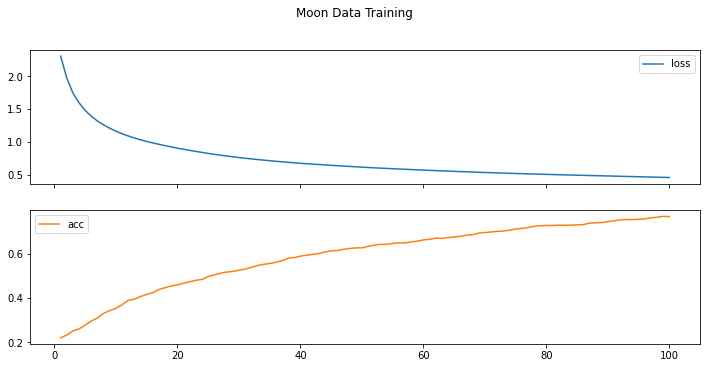

250/250 [==============================] - 0s 39us/sample - loss: 0.5038 - acc: 0.7200


[0.503777108669281, 0.72]

In [10]:
# Plot training loss and accuracy
nn1_moon_hist = pd.DataFrame(nn1_moon.history, index=range(1, len(nn1_moon.history['loss']) + 1))
nn1_moon_hist.plot(subplots=True, figsize=(12, 6), title='Moon Data Training')
plt.xticks(rotation=0, ha='center')
plt.show()

# Evaluate model on test set
nn1.evaluate(X_moon_test, y_moon_test) # loss and accuracy

### 6-neuron neural network

In [11]:
# Sequential NN
nn6 = tf.keras.models.Sequential(name='6-neuron NN')

# Layers
nn6.add(tf.keras.layers.Dense(units=6, activation='relu', input_dim=2)) # input/hidden layer w/ 6 neurons
nn6.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) # output layer

nn6.summary()

Model: "6-neuron NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 6)                 18        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Compile model
nn6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model on blob data
nn6_blob = nn6.fit(X_blob_train, y_blob_train, epochs=100, shuffle=True)

Epoch 1/100
750/750 [==============================] - 0s 163us/sample - loss: 1.0049 - acc: 0.5000
Epoch 2/100
750/750 [==============================] - 0s 42us/sample - loss: 0.8967 - acc: 0.5000
Epoch 3/100
750/750 [==============================] - 0s 44us/sample - loss: 0.8006 - acc: 0.5000
Epoch 4/100
750/750 [==============================] - 0s 56us/sample - loss: 0.7141 - acc: 0.5013
Epoch 5/100
750/750 [==============================] - 0s 52us/sample - loss: 0.6375 - acc: 0.5200
Epoch 6/100
750/750 [==============================] - 0s 56us/sample - loss: 0.5691 - acc: 0.6973
Epoch 7/100
750/750 [==============================] - 0s 46us/sample - loss: 0.5091 - acc: 0.9827
Epoch 8/100
750/750 [==============================] - 0s 57us/sample - loss: 0.4563 - acc: 1.0000
Epoch 9/100
750/750 [==============================] - 0s 44us/sample - loss: 0.4119 - acc: 1.0000
Epoch 10/100
750/750 [==============================] - 0s 46us/sample - loss: 0.3723 - acc: 1.0000
Epoch 11

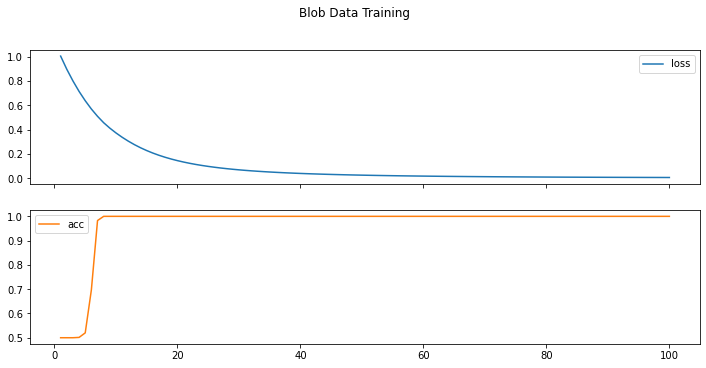

250/250 [==============================] - 0s 128us/sample - loss: 0.0057 - acc: 1.0000


[0.005713585544377566, 1.0]

In [13]:
# Plot training loss and accuracy
nn6_blob_hist = pd.DataFrame(nn6_blob.history, index=range(1, len(nn6_blob.history['loss']) + 1))
nn6_blob_hist.plot(subplots=True, figsize=(12, 6), title='Blob Data Training')
plt.xticks(rotation=0, ha='center')
plt.show()

# Evaluate model on test set
nn6.evaluate(X_blob_test, y_blob_test) # loss and accuracy

Epoch 1/100
750/750 [==============================] - 0s 119us/sample - loss: 1.9153 - acc: 0.3680
Epoch 2/100
750/750 [==============================] - 0s 46us/sample - loss: 1.5621 - acc: 0.3973
Epoch 3/100
750/750 [==============================] - 0s 53us/sample - loss: 1.3243 - acc: 0.4147
Epoch 4/100
750/750 [==============================] - 0s 60us/sample - loss: 1.1615 - acc: 0.4453
Epoch 5/100
750/750 [==============================] - 0s 63us/sample - loss: 1.0423 - acc: 0.4640
Epoch 6/100
750/750 [==============================] - 0s 62us/sample - loss: 0.9471 - acc: 0.4760
Epoch 7/100
750/750 [==============================] - 0s 44us/sample - loss: 0.8704 - acc: 0.4973
Epoch 8/100
750/750 [==============================] - 0s 50us/sample - loss: 0.8029 - acc: 0.5107
Epoch 9/100
750/750 [==============================] - 0s 49us/sample - loss: 0.7436 - acc: 0.5227
Epoch 10/100
750/750 [==============================] - 0s 58us/sample - loss: 0.6913 - acc: 0.5347
Epoch 11

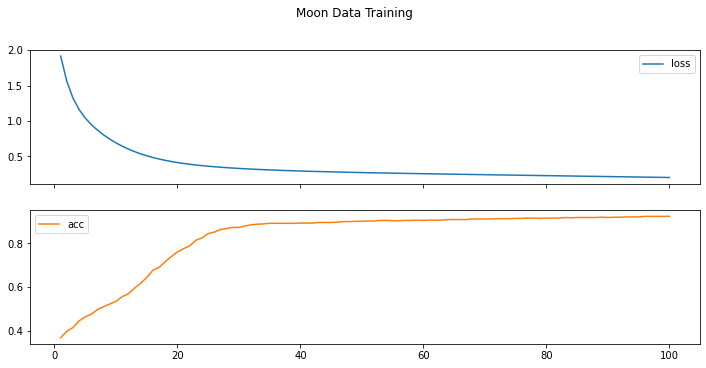

250/250 [==============================] - 0s 34us/sample - loss: 0.2863 - acc: 0.8600


[0.2862631304264069, 0.86]

In [14]:
# Train model on moon data
nn6_moon = nn6.fit(X_moon_train, y_moon_train, epochs=100, shuffle=True)

# Plot training loss and accuracy
nn6_moon_hist = pd.DataFrame(nn6_moon.history, index=range(1, len(nn6_moon.history['loss']) + 1))
nn6_moon_hist.plot(subplots=True, figsize=(12, 6), title='Moon Data Training')
plt.xticks(rotation=0, ha='center')
plt.show()

# Evaluate model on test set
nn6.evaluate(X_moon_test, y_moon_test) # loss and accuracy